In [120]:
from sklearn.cluster import MeanShift
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle


In [95]:
X = [[1, 2], [2, 1], [4, 2], [1, 2], [6 ,4], [1, 1], [4,2], [4,2]]
ms = MeanShift(bin_seeding=True);
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
colors = 1000 * ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

number of estimated clusters : 12


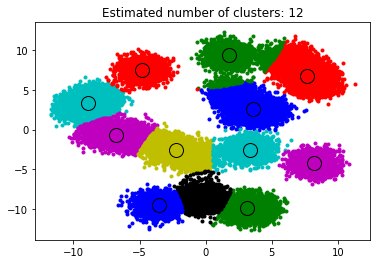

In [130]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=50000, centers=20, cluster_std=0.8)

bandwidth = estimate_bandwidth(X, quantile=0.05, n_samples=500)
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()